**🧠 Projeto Final do Bootcamp CDIA**

---



**💻 Importações e Upload**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from google.colab import files
!pip install xgboost

In [ ]:
uploaded = files.upload()
df = pd.read_excel("bootcamp_train.xlsx")

Saving bootcamp_test.xlsx to bootcamp_test (4).xlsx
Saving bootcamp_train.xlsx to bootcamp_train (3).xlsx


**💻 Pré-processamento**

In [ ]:
label_cols = [col for col in df.columns if col.startswith("falha_")]

In [ ]:
def padronizar_binario(valor):
    if str(valor).strip().lower() in ['1', 'true', 's', 'sim', 'y', 'yes']:
        return 1
    else:
        return 0

In [ ]:
for col in label_cols:
    df[col] = df[col].apply(padronizar_binario)

In [ ]:
entrada_cols = [col for col in df.columns if col not in label_cols + ['id']]
for col in entrada_cols:
    if df[col].dtype == 'object' or df[col].apply(lambda x: isinstance(x, str)).any():
        df[col] = df[col].apply(padronizar_binario)

**💻 Divisão Treinamento / Validação**

In [ ]:
X = df.drop(columns=label_cols + ['id'])
Y = df[label_cols]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

**💻 Treinamento dos modelos**

In [ ]:
modelo_rf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
modelo_rf.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [ ]:
modelo_rf_bal = MultiOutputClassifier(RandomForestClassifier(random_state=42, class_weight='balanced'))
modelo_rf_bal.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       random_state=42))

In [ ]:
xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1,
    random_state=42
)
modelo_xgb = MultiOutputClassifier(xgb)
modelo_xgb.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))

**💻 Avaliação do modelo XBoost**

In [ ]:
Y_pred_xgb = modelo_xgb.predict(X_val)
print(classification_report(Y_val, Y_pred_xgb, target_names=label_cols))

              precision    recall  f1-score   support

     falha_1       0.54      0.28      0.37        47
     falha_2       0.97      0.59      0.73        49
     falha_3       0.99      0.86      0.92       168
     falha_4       0.89      0.76      0.82        21
     falha_5       0.54      0.37      0.44        19
     falha_6       0.54      0.37      0.44       159
falha_outros       0.56      0.49      0.52       215

   micro avg       0.71      0.55      0.62       678
   macro avg       0.72      0.53      0.61       678
weighted avg       0.70      0.55      0.61       678
 samples avg       0.53      0.55      0.54       678



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**💻 Submissão final**

In [ ]:
df_test = pd.read_excel("bootcamp_test.xlsx")

In [ ]:
entrada_cols = [col for col in df_test.columns if col != 'id']
for col in entrada_cols:
    if df_test[col].dtype == 'object' or df_test[col].apply(lambda x: isinstance(x, str)).any():
        df_test[col] = df_test[col].apply(padronizar_binario)

In [ ]:
X_test = df_test[X.columns] 
df_pred = pd.DataFrame(modelo_xgb.predict(X_test), columns=label_cols)
df_pred['id'] = df_test['id']
df_submission = df_pred[['id'] + label_cols]
df_submission.to_excel("final_submission.xlsx", index=False)
files.download("final_submission.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**💻 Probalidades previstas**

In [ ]:
probas = modelo_xgb.predict_proba(X_test)
proba_dict = {label_cols[i]: probas[i][:, 1] for i in range(len(label_cols))}
df_probas = pd.DataFrame(proba_dict)
df_probas['id'] = df_test['id']
df_probas = df_probas[['id'] + label_cols]

In [ ]:
df_probas.head()

,id,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,3390,0.000348,0.000708,0.000056,0.000069,0.000012,0.168293,0.778606
1,3391,0.000264,0.000089,0.018307,0.000025,0.000171,0.112333,0.992843
2,3392,0.016387,0.000042,0.000046,0.000066,0.000091,0.610293,0.239575
3,3393,0.088228,0.000017,0.000026,0.000139,0.929056,0.112823,0.096836
4,3394,0.000173,0.000527,0.000688,0.000146,0.000015,0.667068,0.500767


In [ ]:
df_probas.iloc[0]

,0
id,3390.000000
falha_1,0.000348
falha_2,0.000708
falha_3,0.000056
falha_4,0.000069
falha_5,0.000012
falha_6,0.168293
falha_outros,0.778606


In [ ]:
df_probas[label_cols].mean().sort_values(ascending=False)

,0
falha_outros,0.327917
falha_3,0.192560
falha_6,0.171471
falha_2,0.084053
falha_1,0.040113
falha_4,0.032548
falha_5,0.021999


**📊 Gráficos**

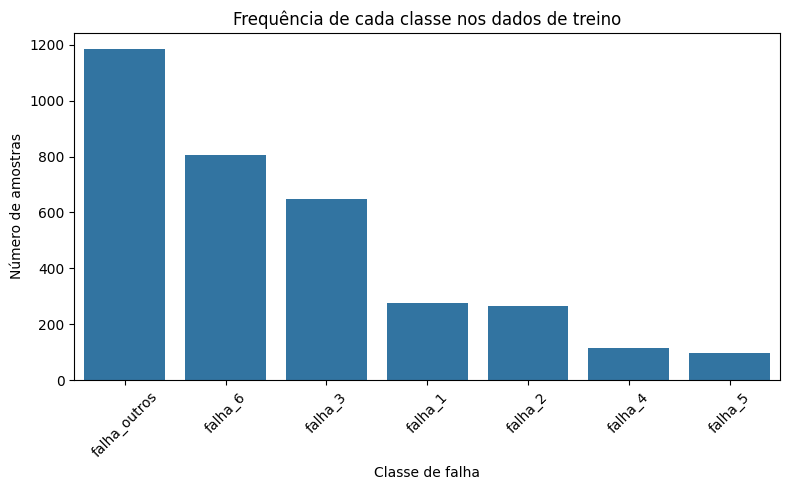

In [ ]:
frequencias = Y.sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=frequencias.index, y=frequencias.values)
plt.title("Frequência de cada classe nos dados de treino")
plt.ylabel("Número de amostras")
plt.xlabel("Classe de falha")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


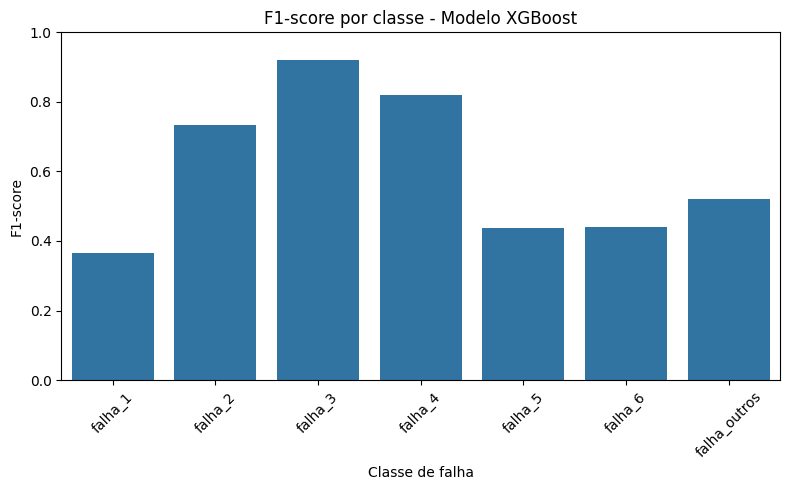

In [ ]:
report_dict = classification_report(Y_val, Y_pred_xgb, target_names=label_cols, output_dict=True)
f1_scores = {k: v['f1-score'] for k, v in report_dict.items() if k in label_cols}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("F1-score por classe - Modelo XGBoost")
plt.ylabel("F1-score")
plt.xlabel("Classe de falha")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

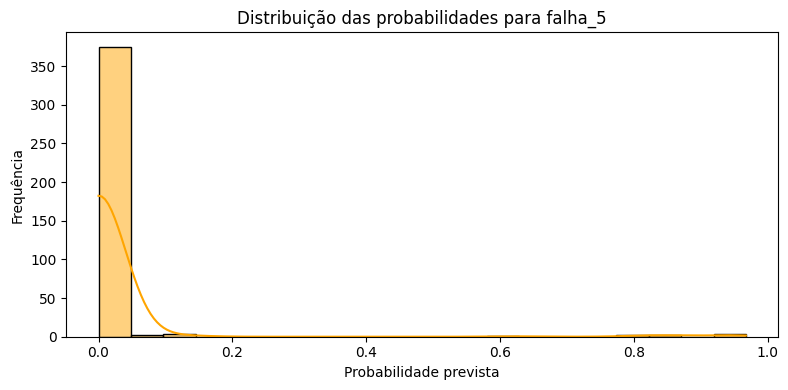

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_probas['falha_5'], bins=20, kde=True, color='orange')
plt.title("Distribuição das probabilidades para falha_5")
plt.xlabel("Probabilidade prevista")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

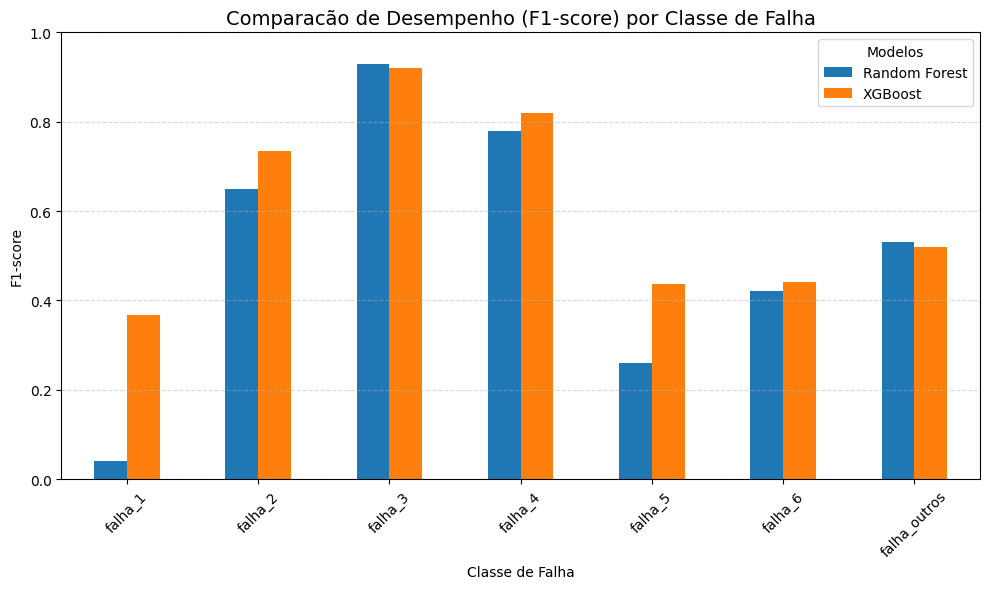

In [ ]:
f1_rf = {
    "falha_1": 0.04,
    "falha_2": 0.65,
    "falha_3": 0.93,
    "falha_4": 0.78,
    "falha_5": 0.26,
    "falha_6": 0.42,
    "falha_outros": 0.53
}
comparacao_df = pd.DataFrame({"RandomForest": f1_rf, "XGBoost": f1_scores})
comparacao_df.plot(kind="bar", figsize=(10, 6), rot=45, color=["#1f77b4", "#ff7f0e"])
plt.title("Comparacão de Desempenho (F1-score) por Classe de Falha", fontsize=14)
plt.ylabel("F1-score")
plt.xlabel("Classe de Falha")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Modelos", labels=["Random Forest", "XGBoost"], loc="upper right")
plt.tight_layout()
plt.savefig("comparacao_f1score_modelos.png", dpi=300)
plt.show()